In [2]:
#Loading model in to be used to predict following 24 hours 
from sklearn.externals import joblib
clf = joblib.load('24hourSVR.pkl') 

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seed = 7
np.random.seed(seed)

In [4]:
data = pd.read_csv('/Users/judemurphy/Project Notebooks/prediction_data.csv')
data.head()

timestamp  blood_glucose  rapid_acting_insulin  \
0  02/05/2019 00:00            5.8                     0   
1  02/05/2019 00:05            6.0                     0   
2  02/05/2019 00:10            6.1                     0   
3  02/05/2019 00:15            6.1                     0   
4  02/05/2019 00:20            6.1                     0   

   carbohydrates_consumed  protein_consumed  fat_consumed  \
0                       0                 0             0   
1                       0                 0             0   
2                       0                 0             0   
3                       0                 0             0   
4                       0                 0             0   

   long_acting_insulin  asleep_awake  active_inactive  
0                    0             1                0  
1                    0             1                0  
2                    0             1                0  
3                    0             1                0  
4                    0             1                0

In [5]:
data

timestamp  blood_glucose  rapid_acting_insulin  \
0    02/05/2019 00:00            5.8                     0   
1    02/05/2019 00:05            6.0                     0   
2    02/05/2019 00:10            6.1                     0   
3    02/05/2019 00:15            6.1                     0   
4    02/05/2019 00:20            6.1                     0   
5    02/05/2019 00:25            6.1                     0   
6    02/05/2019 00:30            6.0                     0   
7    02/05/2019 00:35            6.0                     0   
8    02/05/2019 00:40            6.0                     0   
9    02/05/2019 00:45            6.0                     0   
10   02/05/2019 00:50            6.0                     0   
11   02/05/2019 00:55            6.0                     0   
12   02/05/2019 01:00            5.9                     0   
13   02/05/2019 01:05            5.9                     0   
14   02/05/2019 01:10            5.9                     0   
15   02/05/2019 01:15            5.9                     0   
16   02/05/2019 01:20            5.9                     0   
17   02/05/2019 01:25            6.0                     0   
18   02/05/2019 01:30            6.0                     0   
19   02/05/2019 01:35            6.0                     0   
20   02/05/2019 01:40            6.0                     0   
21   02/05/2019 01:45            6.0                     0   
22   02/05/2019 01:50            6.0                     0   
23   02/05/2019 01:55            5.9                     0   
24   02/05/2019 02:00            5.9                     0   
25   02/05/2019 02:05            5.9                     0   
26   02/05/2019 02:10            5.9                     0   
27   02/05/2019 02:15            5.9                     0   
28   02/05/2019 02:20            5.9                     0   
29   02/05/2019 02:25            5.9                     0   
..                ...            ...                   ...   
547  02/06/2019 21:35           12.3                     5   
548  02/06/2019 21:40           13.0                     0   
549  02/06/2019 21:45           13.8                     0   
550  02/06/2019 21:50           14.5                     0   
551  02/06/2019 21:55           15.5                     0   
552  02/06/2019 22:00           16.6                     0   
553  02/06/2019 22:05           17.6                     0   
554  02/06/2019 22:10           18.8                     0   
555  02/06/2019 22:15           19.0                     0   
556  02/06/2019 22:20           19.2                     0   
557  02/06/2019 22:25           19.3                     0   
558  02/06/2019 22:30           19.5                     0   
559  02/06/2019 22:35           19.7                     0   
560  02/06/2019 22:40           19.7                     0   
561  02/06/2019 22:45           19.7                     0   
562  02/06/2019 22:50           19.7                     0   
563  02/06/2019 22:55           19.5                     0   
564  02/06/2019 23:00           19.4                     0   
565  02/06/2019 23:05           19.7                     0   
566  02/06/2019 23:10           19.9                     0   
567  02/06/2019 23:15           20.2                     0   
568  02/06/2019 23:20           20.4                     3   
569  02/06/2019 23:25           20.3                     0   
570  02/06/2019 23:30           20.1                     0   
571  02/06/2019 23:35           20.0                     0   
572  02/06/2019 23:40           19.9                     0   
573  02/06/2019 23:45           19.8                     0   
574  02/06/2019 23:50           19.7                     0   
575  02/06/2019 23:55           19.5                     0   
576  02/07/2019 00:00           19.3                     0   

     carbohydrates_consumed  protein_consumed  fat_consumed  \
0                         0                 0             0   
1                         0              

In [6]:
data.isna().any()

timestamp                 False
blood_glucose             False
rapid_acting_insulin      False
carbohydrates_consumed    False
protein_consumed          False
fat_consumed              False
long_acting_insulin       False
asleep_awake              False
active_inactive           False
dtype: bool

In [7]:
data.timestamp = pd.to_datetime(data.timestamp)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
timestamp                 577 non-null datetime64[ns]
blood_glucose             577 non-null float64
rapid_acting_insulin      577 non-null int64
carbohydrates_consumed    577 non-null int64
protein_consumed          577 non-null int64
fat_consumed              577 non-null int64
long_acting_insulin       577 non-null int64
asleep_awake              577 non-null int64
active_inactive           577 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 40.6 KB


In [9]:
data=data.set_index('timestamp')

In [10]:
data #Note, when predicting 24 hours we must use both the data from 5th Feb and 6th Feb 

blood_glucose  rapid_acting_insulin  \
timestamp                                                  
2019-02-05 00:00:00            5.8                     0   
2019-02-05 00:05:00            6.0                     0   
2019-02-05 00:10:00            6.1                     0   
2019-02-05 00:15:00            6.1                     0   
2019-02-05 00:20:00            6.1                     0   
2019-02-05 00:25:00            6.1                     0   
2019-02-05 00:30:00            6.0                     0   
2019-02-05 00:35:00            6.0                     0   
2019-02-05 00:40:00            6.0                     0   
2019-02-05 00:45:00            6.0                     0   
2019-02-05 00:50:00            6.0                     0   
2019-02-05 00:55:00            6.0                     0   
2019-02-05 01:00:00            5.9                     0   
2019-02-05 01:05:00            5.9                     0   
2019-02-05 01:10:00            5.9                     0   
2019-02-05 01:15:00            5.9                     0   
2019-02-05 01:20:00            5.9                     0   
2019-02-05 01:25:00            6.0                     0   
2019-02-05 01:30:00            6.0                     0   
2019-02-05 01:35:00            6.0                     0   
2019-02-05 01:40:00            6.0                     0   
2019-02-05 01:45:00            6.0                     0   
2019-02-05 01:50:00            6.0                     0   
2019-02-05 01:55:00            5.9                     0   
2019-02-05 02:00:00            5.9                     0   
2019-02-05 02:05:00            5.9                     0   
2019-02-05 02:10:00            5.9                     0   
2019-02-05 02:15:00            5.9                     0   
2019-02-05 02:20:00            5.9                     0   
2019-02-05 02:25:00            5.9                     0   
...                            ...                   ...   
2019-02-06 21:35:00           12.3                     5   
2019-02-06 21:40:00           13.0                     0   
2019-02-06 21:45:00           13.8                     0   
2019-02-06 21:50:00           14.5                     0   
2019-02-06 21:55:00           15.5                     0   
2019-02-06 22:00:00           16.6                     0   
2019-02-06 22:05:00           17.6                     0   
2019-02-06 22:10:00           18.8                     0   
2019-02-06 22:15:00           19.0                     0   
2019-02-06 22:20:00           19.2                     0   
2019-02-06 22:25:00           19.3                     0   
2019-02-06 22:30:00           19.5                     0   
2019-02-06 22:35:00           19.7                     0   
2019-02-06 22:40:00           19.7                     0   
2019-02-06 22:45:00           19.7                     0   
2019-02-06 22:50:00           19.7                     0   
2019-02-06 22:55:00           19.5                     0   
2019-02-06 23:00:00           19.4                     0   
2019-02-06 23:05:00           19.7                     0   
2019-02-06 23:10:00           19.9                     0   
2019-02-06 23:15:00           20.2                     0   
2019-02-06 23:20:00           20.4                     3   
2019-02-06 23:25:00           20.3                     0   
2019-02-06 23:30:00           20.1                     0   
2019-02-06 23:35:00           20.0                     0   
2019-02-06 23:40:00           19.9                     0   
2019-02-06 23:45:00           19.8                     0   
2019-02-06 23:50:00           19.7                     0   
2019-02-06 23:55:00           19.5                     0   
2019-02-07 00:00:00           19.3                     0   

                     carbohydrates_consumed  protein_consumed  fat_consumed  \
timestamp                                                                     
2019-02-05 00:00:00                       0                 0             0   
201

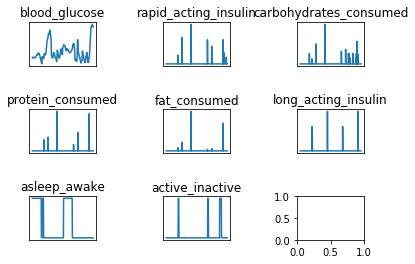

In [11]:
groups = [0, 1, 2, 3, 4, 5, 6, 7]
values = data.values
fig,sub = plt.subplots(3,3)
plt.subplots_adjust(wspace=1, hspace=1)

for ax, i in zip(sub.flatten(),groups):
    ax.plot(values[:,i])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(data.columns[i])

In [12]:
#Scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
scaled[0]

array([0.15116279, 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        ])

In [13]:
scaled

array([[0.15116279, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1627907 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16860465, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.95930233, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.94767442, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93604651, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
def to_supervised(data,dropNa = True,lag = 1):
    df = pd.DataFrame(data)
    column = []
    column.append(df)
    for i in range(1,lag+1):
        column.append(df.shift(-i))
    df = pd.concat(column,axis=1)
    df.dropna(inplace = True)
    features = data.shape[1]
    df = df.values
    supervised_data = df[:,:features*lag]
    supervised_data = np.column_stack( [supervised_data, df[:,features*lag]])
    return supervised_data

In [15]:
pd.set_option('display.max_columns', None)
import numpy as np 
timeSteps = 288 #Note, 288 timesteps as this represents 24 hours 

supervised = to_supervised(scaled,lag=timeSteps)
pd.DataFrame(supervised)

0     1     2     3     4     5     6     7         8     9     10    \
0    0.151163   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
1    0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.168605   0.0   0.0   
2    0.168605   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.168605   0.0   0.0   
3    0.168605   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.168605   0.0   0.0   
4    0.168605   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.168605   0.0   0.0   
5    0.168605   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
6    0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
7    0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
8    0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
9    0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
10   0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
11   0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
12   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
13   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
14   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
15   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
16   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
17   0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
18   0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
19   0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
20   0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
21   0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.162791   0.0   0.0   
22   0.162791   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
23   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
24   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
25   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
26   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
27   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
28   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
29   0.156977   0.0   0.0   0.0   0.0   0.0   1.0   0.0  0.156977   0.0   0.0   
..        ...   ...   ...   ...   ...   ...   ...   ...       ...   ...   ...   
259  0.168605   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.174419   0.0   0.0   
260  0.174419   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.174419   0.0   0.0   
261  0.174419   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.191860   0.0   0.0   
262  0.191860   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.209302   0.0   0.0   
263  0.209302   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.226744   0.0   0.0   
264  0.226744   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.267442   0.0   0.0   
265  0.267442   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.302326   0.0   0.0   
266  0.302326   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.360465   0.0   0.0   
267  0.360465   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.366279   0.0   0.0   
268  0.366279   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.366279   0.0   0.0   
269  0.366279   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.372093   0.0   0.0   
270  0.372093   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.360465   0.0   0.0   
271  0.360465   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.343023   0.0   0.0   
272  0.343023   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.331395   0.0   0.0   
273  0.331395   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.343023   0.0   0.0   
274  0.343023   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.348837   0.0   0.0   
275  0.348837   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.360465   0.0   0.0   
276  0.360465   0.0   0.0   0.0   0.0   

In [16]:
# spiltting the data
# training on only first year data
features = data.shape[1]
X = supervised[:,:features*timeSteps]
y = supervised[:,features*timeSteps]

In [17]:
X

array([[0.15116279, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1627907 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16860465, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.31395349, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38953488, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40697674, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
y

array([0.40697674, 0.4127907 , 0.41860465, 0.4244186 , 0.43023256,
       0.43604651, 0.45348837, 0.47093023, 0.47674419, 0.47674419,
       0.48255814, 0.48255814, 0.47674419, 0.47674419, 0.47093023,
       0.47093023, 0.46511628, 0.45930233, 0.45348837, 0.44767442,
       0.44767442, 0.44186047, 0.44186047, 0.43023256, 0.4244186 ,
       0.4127907 , 0.39534884, 0.37209302, 0.35465116, 0.34883721,
       0.34302326, 0.3372093 , 0.34883721, 0.36046512, 0.37209302,
       0.37790698, 0.38372093, 0.38953488, 0.38953488, 0.38372093,
       0.38372093, 0.37209302, 0.36627907, 0.35465116, 0.35465116,
       0.35465116, 0.35465116, 0.35465116, 0.35465116, 0.35465116,
       0.34302326, 0.3372093 , 0.3255814 , 0.3255814 , 0.3255814 ,
       0.3255814 , 0.31976744, 0.31976744, 0.31395349, 0.30232558,
       0.29651163, 0.28488372, 0.28488372, 0.28488372, 0.28488372,
       0.28488372, 0.27906977, 0.27906977, 0.27906977, 0.27906977,
       0.27906977, 0.28488372, 0.29651163, 0.30232558, 0.30813

In [19]:
X.shape

(289, 2304)

In [20]:
y.shape

(289,)

In [21]:
clf

SVR(C=1.5, cache_size=2000, coef0=0.0, degree=3, epsilon=0.02, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [22]:
#Using loaded model to predict 
y_pred = clf.predict(X)

In [23]:
y_pred

array([0.41666386, 0.43601627, 0.42356159, 0.42508102, 0.44040611,
       0.43044524, 0.46514617, 0.46313962, 0.50121551, 0.47529475,
       0.48566956, 0.46788299, 0.4832584 , 0.48662427, 0.49373176,
       0.46515296, 0.44800668, 0.4731987 , 0.46139542, 0.44702888,
       0.44806011, 0.42696152, 0.43025924, 0.42100416, 0.42653849,
       0.39593345, 0.39002661, 0.39391458, 0.35809282, 0.36729257,
       0.36088803, 0.34693454, 0.32090701, 0.34526029, 0.36725575,
       0.37880974, 0.38973602, 0.38990574, 0.40127292, 0.39551188,
       0.38792489, 0.37990513, 0.36025082, 0.37313751, 0.32614212,
       0.34383472, 0.3597461 , 0.34127333, 0.35660826, 0.34122748,
       0.35606438, 0.33170007, 0.3333628 , 0.33090296, 0.31879685,
       0.30688546, 0.31947042, 0.31680982, 0.31596883, 0.30526987,
       0.29378806, 0.28655528, 0.28845221, 0.28353886, 0.28307652,
       0.28075505, 0.28001093, 0.27898189, 0.26024081, 0.25485753,
       0.25692282, 0.27299306, 0.28125269, 0.29512653, 0.30244

In [24]:
X.shape

(289, 2304)

In [25]:
y_pred.shape

(289,)

In [26]:
y_pred = y_pred.reshape(-1,1)

In [27]:
y_pred

array([[0.41666386],
       [0.43601627],
       [0.42356159],
       [0.42508102],
       [0.44040611],
       [0.43044524],
       [0.46514617],
       [0.46313962],
       [0.50121551],
       [0.47529475],
       [0.48566956],
       [0.46788299],
       [0.4832584 ],
       [0.48662427],
       [0.49373176],
       [0.46515296],
       [0.44800668],
       [0.4731987 ],
       [0.46139542],
       [0.44702888],
       [0.44806011],
       [0.42696152],
       [0.43025924],
       [0.42100416],
       [0.42653849],
       [0.39593345],
       [0.39002661],
       [0.39391458],
       [0.35809282],
       [0.36729257],
       [0.36088803],
       [0.34693454],
       [0.32090701],
       [0.34526029],
       [0.36725575],
       [0.37880974],
       [0.38973602],
       [0.38990574],
       [0.40127292],
       [0.39551188],
       [0.38792489],
       [0.37990513],
       [0.36025082],
       [0.37313751],
       [0.32614212],
       [0.34383472],
       [0.3597461 ],
       [0.341

In [28]:
y_pred.shape

(289, 1)

In [29]:
X

array([[0.15116279, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1627907 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16860465, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.31395349, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38953488, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40697674, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
X.shape

(289, 2304)

In [31]:
#Reshaping and scaling the data back to original range 
inv_new = np.concatenate( (y_pred, X[:,-7:] ) , axis =1)
inv_new = scaler.inverse_transform(inv_new)
final_pred = inv_new[:,0]

y = y.reshape( len(y), 1)

inv_new = np.concatenate( (y, X[:,-7:] ) ,axis = 1)
inv_new = scaler.inverse_transform(inv_new)
actual_pred = inv_new[:,0]

In [32]:
final_pred

array([10.36661835, 10.69947983, 10.4852593 , 10.51139359, 10.7749851 ,
       10.60365813, 11.2005141 , 11.16600151, 11.82090676, 11.37506976,
       11.5535164 , 11.24758742, 11.51204444, 11.5699374 , 11.69218627,
       11.20063089, 10.90571488, 11.33901763, 11.13600114, 10.88889682,
       10.90663385, 10.54373816, 10.60045894, 10.44127155, 10.53646203,
       10.01005525,  9.9084577 ,  9.9753308 ,  9.35919654,  9.51743225,
        9.40727419,  9.16727407,  8.71960058,  9.13847707,  9.5167989 ,
        9.7155275 ,  9.90345948,  9.90637877, 10.1018942 , 10.00280436,
        9.87230806,  9.73436827,  9.39631402,  9.61796515,  8.80964444,
        9.11395726,  9.38763299,  9.06990123,  9.3336621 ,  9.06911273,
        9.32430731,  8.90524121,  8.93384019,  8.89153088,  8.68330589,
        8.47842984,  8.69489118,  8.64912894,  8.63466383,  8.45064174,
        8.25315455,  8.12875084,  8.16137803,  8.07686842,  8.0689161 ,
        8.0289868 ,  8.01618808,  7.99848853,  7.67614186,  7.58

In [33]:
final_pred = np.round_(final_pred, decimals=1, out = None)

In [34]:
actual_pred

array([10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 11. , 11.3, 11.4, 11.4, 11.5,
       11.5, 11.4, 11.4, 11.3, 11.3, 11.2, 11.1, 11. , 10.9, 10.9, 10.8,
       10.8, 10.6, 10.5, 10.3, 10. ,  9.6,  9.3,  9.2,  9.1,  9. ,  9.2,
        9.4,  9.6,  9.7,  9.8,  9.9,  9.9,  9.8,  9.8,  9.6,  9.5,  9.3,
        9.3,  9.3,  9.3,  9.3,  9.3,  9.3,  9.1,  9. ,  8.8,  8.8,  8.8,
        8.8,  8.7,  8.7,  8.6,  8.4,  8.3,  8.1,  8.1,  8.1,  8.1,  8.1,
        8. ,  8. ,  8. ,  8. ,  8. ,  8.1,  8.3,  8.4,  8.5,  8.5,  8.6,
        8.7,  8.7,  8.8,  8.9,  8.9,  9. ,  9. ,  9.1,  9.1,  9.3,  9.6,
        9.8,  9.9,  9.9, 10. , 10.3, 10.5, 10.8, 11.1, 11.4, 11.7, 11.6,
       11.5, 11.6, 11.7, 11.8, 11.9, 11.9, 12. , 11.7, 11.5, 11.2, 10.7,
       10.3,  9.8,  9.4,  8. ,  6.6,  5.3,  5.1,  4.9,  4.7,  4.8,  4.8,
        4.9,  5. ,  5.1,  5.2,  5.1,  4.9,  4.8,  4.6,  4.5,  4.3,  4.3,
        4.3,  4.3,  4.9,  5.5,  7.9,  9.2, 10.5, 12.6, 13.2, 13.7, 13.5,
       12. , 11. ,  9.9,  9.4,  8.8,  8.3,  8.1,  7

In [35]:
bg_pred = pd.DataFrame(final_pred)
bg_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 1 columns):
0    289 non-null float64
dtypes: float64(1)
memory usage: 2.3 KB


In [36]:
bg_actual = pd.DataFrame(actual_pred)
bg_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 1 columns):
0    289 non-null float64
dtypes: float64(1)
memory usage: 2.3 KB


In [37]:
bg_actual

0
0    10.2
1    10.3
2    10.4
3    10.5
4    10.6
5    10.7
6    11.0
7    11.3
8    11.4
9    11.4
10   11.5
11   11.5
12   11.4
13   11.4
14   11.3
15   11.3
16   11.2
17   11.1
18   11.0
19   10.9
20   10.9
21   10.8
22   10.8
23   10.6
24   10.5
25   10.3
26   10.0
27    9.6
28    9.3
29    9.2
..    ...
259  12.3
260  13.0
261  13.8
262  14.5
263  15.5
264  16.6
265  17.6
266  18.8
267  19.0
268  19.2
269  19.3
270  19.5
271  19.7
272  19.7
273  19.7
274  19.7
275  19.5
276  19.4
277  19.7
278  19.9
279  20.2
280  20.4
281  20.3
282  20.1
283  20.0
284  19.9
285  19.8
286  19.7
287  19.5
288  19.3

[289 rows x 1 columns]

In [38]:
bg_pred

0
0    10.4
1    10.7
2    10.5
3    10.5
4    10.8
5    10.6
6    11.2
7    11.2
8    11.8
9    11.4
10   11.6
11   11.2
12   11.5
13   11.6
14   11.7
15   11.2
16   10.9
17   11.3
18   11.1
19   10.9
20   10.9
21   10.5
22   10.6
23   10.4
24   10.5
25   10.0
26    9.9
27   10.0
28    9.4
29    9.5
..    ...
259  11.7
260  13.1
261  12.9
262  14.5
263  14.8
264  15.9
265  17.3
266  17.5
267  19.2
268  19.3
269  19.2
270  19.3
271  19.5
272  19.8
273  19.6
274  19.4
275  19.1
276  19.2
277  19.1
278  20.1
279  19.8
280  20.5
281  20.0
282  20.0
283  20.1
284  19.1
285  19.3
286  19.3
287  19.3
288  19.2

[289 rows x 1 columns]

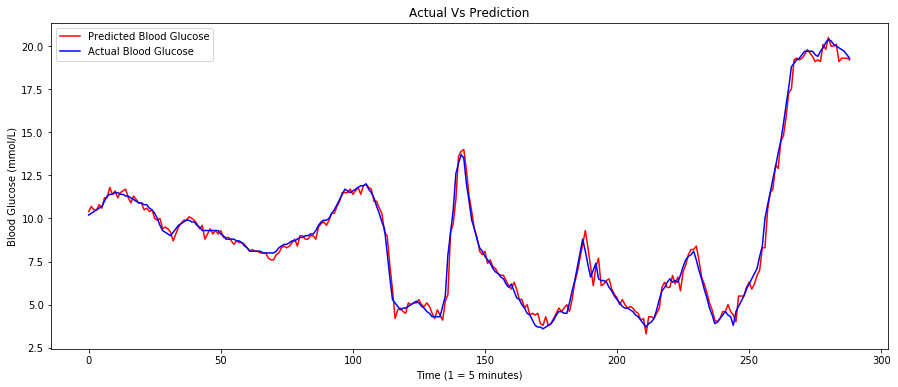

In [39]:
# Visualising the results
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.plot(bg_pred, color = 'red', label = 'Predicted Blood Glucose')
plt.plot(bg_actual, color = 'blue', label = 'Actual Blood Glucose')
plt.title('Actual Vs Prediction')
plt.xlabel('Time (1 = 5 minutes)')
plt.ylabel('Blood Glucose (mmol/L)')
plt.legend()
plt.show()

In [40]:
##Using Test data - 5th Feb 
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
#calculate RMSE
rmse = sqrt(mean_squared_error(final_pred, actual_pred))
print('Test RMSE: %.4f' % rmse)

Test RMSE: 0.3964
